# Contrôle optimal TP 3

Contrôle optimal de l'équation de la chaleur

In [35]:
import numpy as np
import matplotlib.pyplot as plt  


## Introduction 



On considère une barre unidimensionnelle de longueur $L > 0$. La température de l'extrémité gauche de la barre ( $ x = 0 $ ) est maintenue à $0^{\circ}\mathrm{K}$, et on cherche à contrôler la température de la barre à l'extrémité droite ($x = L$) à l'aide d'un flux de chaleur $t \mapsto u(t)$. On appelle $y_u(t, x)$ la température de cette barre au temps $t \in [0, T]$ et en $x \in [0, L]$.

On suppose que $y_u$ résout l'équation de la chaleur
$$
\begin{cases}
    \partial_t y_u(t, x) - \partial_{xx} y_u(t, x)= 0, & (t, x) \in ]0, T[ \times ]0, L[ \\
    y_u(0, x) = 0, & x \in [0, L] \\
    y_u(t, 0) = 0, & t \in [0, T] \quad (\text{condition de Dirichlet homogène}) \\
    \partial_x y_u(t, L) = u(t), & t \in [0, T] \quad (\text{condition de Neumann non-homogène})
\end{cases}
$$

et on s'intéresse au problème de contrôle optimal
$$
\inf_{u \in L^2(]0, T[)} J(u)
$$
où
$
J(u) = \frac{1}{2} \int_{0}^{T} (y_u(t, L) - z_d(t))^2 \, dt + \frac{\varepsilon}{2} \int_{0}^{T} u(t)^2 \, dt \quad (\text{P})
$
où $\varepsilon > 0$ est un paramètre fixé, et $z_d \in L^2(]0, T[)$ est donnée.


## Question 1

Montrer que $J$ est différentiable. En introduisant un problème adjoint bien choisi, calculer le gradient de $J$ en $u$.

### Montrons la différentiabilité de $J$



$
J(u) = \frac{1}{2} \int_{0}^{T} (y_u(t, L) - z_d(t))^2 \, dt + \frac{\varepsilon}{2} \int_{0}^{T} u(t)^2 \, dt \quad (\text{P})
$
où $\varepsilon > 0$ est un paramètre fixé, et $z_d \in L^2(]0, T[)$ 


Soit $(u, h) \in U^2_{ad}$. Puisque $U_{ad}$ est convexe, alors $u + \varepsilon h $ appartient à $U_{ad}$.


Posons $z_h = \frac{ y_{u + \varepsilon h} - y_u}{\varepsilon}$ , on $z_h$ solution de 

$$
\begin{cases}
    \partial_t z_{h}(t, x) - \partial_{xx} z_{h}(t, x)= 0, & (t, x) \in ]0, T[ \times ]0, L[ \\
    z_{h}(0, x) = 0, & x \in [0, L] \\
    z_{h}(t, 0) = 0, & t \in [0, T] \\
    \partial_x z_{h}(t, L) =  h(t), & t \in [0, T] 
\end{cases}
$$

Si $ u \mapsto y_u $ est différentiable alors sa différentielle est $z_h$. Pour montrer la différentiabilité, on doit prouver que :

$$|| y_{u+h} - y_u - z_h ||_{L^2(]0, T[)} = o(||h||) $$





Posons $S_h = y_{u+h} - y_u - z_h$ , on a :

$$
\begin{cases}
    \partial_t S_{h}(t, x) - \partial_{xx} S_{h}(t, x)= 0, & (t, x) \in ]0, T[ \times ]0, L[ \\
    S_{h}(0, x) = 0, & x \in [0, L] \\
    S_{h}(t, 0) = 0, & t \in [0, T] \\
    \partial_x S_{h}(t, L) = 0, & t \in [0, T] 
\end{cases}
$$

Par unicité de la solution de l'EDP, on a :
$$S_{h} = 0 = o(||h||)$$
Il reste à montrer que $ h \mapsto z_h$ est continue où 
$$
\begin{cases}
    \partial_t z_{h}(t, x) - \partial_{xx} z_{h}(t, x)= 0, & (t, x) \in ]0, T[ \times ]0, L[ \\
    z_{h}(0, x) = 0, & x \in [0, L] \\
    z_{h}(t, 0) = 0, & t \in [0, T] \\
    \partial_x z_{h}(t, L) = h(t), & t \in [0, T] 
\end{cases}
$$

On veut monter qu'il existe $C>0$ tel que $ $




Par composition d'applications différentiables, la fonction $J$ est différentiable.


### Calculons le gradient de $J$

Considérons la fonction coût $J(u) = J_1(u) + J_2(u) $

Avec $J_1(u) = \frac{1}{2} \int_{0}^{T} (y_u(t, L) - z_d(t))^2 \, dt$ et 
$J_2(u) = \frac{\alpha}{2} \int_{0}^{T} u(t)^2 \, dt $

où $ \alpha > 0 $ est un paramètre fixé et  $z_d \in L^2(]0, T[)$ est donnée

Calculons la différentiel de $J_2(u)$ :

$$
 \frac{ J_2(u + \varepsilon h ) - J_2(u) }{\varepsilon}= 
\frac{\alpha }{2\varepsilon} \int_{0}^{T} (u + \varepsilon h)^2 - u^2\, dt=
\frac{\alpha }{2\varepsilon} \int_{0}^{T}  2 \varepsilon h u - \varepsilon ^2 h^2\, dt =
\frac{\alpha }{2} \int_{0}^{T}  2 \varepsilon h u - \varepsilon  h\, dt 
$$

Donc $ \nabla J_2(u)h = \int_{0}^{T} \alpha h u \, dt $

Calculons la différentiel de $J_1(u)$ :

$$ 
\begin{align*}
\frac{ J_1(u + \varepsilon h ) - J_1(u) }{\varepsilon}  &=  
\frac{1}{2\varepsilon} \int_{0}^{T} (y_{u + \varepsilon h }(t, L) - z_d(t))^2  - (y_{u}(t, L) - z_d(t))^2\, dt \\ &= 
\frac{1}{2} \int_{0}^{T} [\frac{y_{u + \varepsilon h }(t, L) - y_h }{\varepsilon}][ y_{u + \varepsilon h }(t, L) + y_u(t, L) - z_d(t)] \, dt 
\end{align*}
$$

Donc $$ \nabla J_1(u)h = \underset{\varepsilon \to 0}{lim} \frac{ J_1(u + \varepsilon h ) - J_1(u) }{\varepsilon} = \int_{0}^{T}  z_h(t, L)  (y_u(t, L) - z_d(t))\, dt $$

Avec $z_h(t, L) = \frac{y_{u + \varepsilon h }(t, L) - y_h(t, L) }{\varepsilon} $ 

Suivons la méthodologie de l'adjoint :
* Etape 1

    L'équation de $z_h$ est sous la forme $ Rz_h = 0$ avec $R = \partial_t -\Delta $ et on a $R^{*} = -\partial_t -\Delta $


* Etape 2

    Soit $p$ solution de $ -\partial_t p -\Delta p = G$
    où $G$ est un second membre à préciser.

* Etape 3

    On multiplie l’équation sur $z_h$ par $p$ et on intègre 
    $$
    \int_{0}^{T} \int_{0}^{L} (\partial_t z_h- \partial_{xx} z_h ) p \,dx \,dt = 0
    $$

    On intègre par parties : 
    $$
    \int_{0}^{L} [ z_{h}p]^{T}_{0} \,dx - \int_{0}^{T}\int_{0}^{L} z_h\cdot{} \partial_t p \,dx \,dt - \int_{0}^{T} [ \partial_{x} z_{h} \cdot{}p]^{L}_{0} + \int_{0}^{T}\int_{0}^{L} \partial_{x} z_h \cdot{}\partial_{x}p \,dx \,dt = 0
    $$

    
    Comme $z_h(0,x) = 0$ et en simplifiant on obtient
    $$
    \int_{0}^{L} z_{h}(T,.)p(T,.) \,dx - \int_{0}^{T} [ \partial_{x} z_{h} \cdot{}p]^{L}_{0}\,dt + \int_{0}^{T}\int_{0}^{L} - z_h\cdot{} \partial_t p  + \partial_{x} z_h \cdot{}\partial_{x}p \,dx \,dt  = 0 \quad (1)
    $$


    On multiplie l’équation sur $p$ par $z_h$ 
    $$
    \int_{0}^{T} \int_{0}^{L} (- \partial_t p- \partial_{xx} p ) z_h \,dx \,dt = \int_{0}^{T} \int_{0}^{L} G z_h
    $$

    On intègre par parties en espace : 
    $$
    \int_{0}^{T} \int_{0}^{L} -\partial_t p \cdot{}z_{h} +  \partial_{x}p\cdot{}\partial_{x}z_h  \,dx \,dt - \int_{0}^{T} [ \partial_{x}p\cdot{}z_{h}]^{L}_{0} \,dt = \int_{0}^{T} \int_{0}^{L} G z_h \,dx \,dt \quad (2)
    $$

    En soustrayant $(2)$ par $(1)$, on a 
    $$
    -\int_{0}^{L} z_{h}(T,.)p(T,.) \,dx + \int_{0}^{T} [ \partial_{x} z_{h} \cdot{}p]^{L}_{0}\,dt - \int_{0}^{T} [ \partial_{x}p\cdot{}z_{h}]^{L}_{0} \,dt = \int_{0}^{T} \int_{0}^{L} G z_h \,dx \,dt 
    $$

    Comme $z_{h}(t,0) = 0$ ,et en choisissant $p(t,0) = p(T,x) = 0$ et aussi $G = 0$ , on a 
    $$
    \int_{0}^{T} \partial_{x} z_{h}(t,L) \cdot{} p(t,L)\,dt - \int_{0}^{T} \partial_{x} p(t,L) \cdot{}z_{h}(t,L)  \,dt = 0
    $$

    Puisque $\partial_{x} z_{h}(t,L) = h(t) $   puis on choisit $\partial_x p(t, L) = y_u(t, L) - z_d(t)$,  on obtient :
    $$
    \int_{0}^{T} h(t) \cdot{} p(t,L)\,dt = \int_{0}^{T} [ y_u(t, L) - z_d(t) ] \cdot{}z_{h}(t,L)  \,dt 
    $$

    Donc $ \nabla J_1(u)h = \int_{0}^{T} h(t) \cdot{} p(t,L)\,dt  $

Finalement $$ \nabla J(u)h = \int_{0}^{T} h(t) \cdot{} ( p(t,L) + \alpha u(t))\,dt  $$
où $p$ est solution de 
$$
\begin{cases}
    \partial_t p(t, x) + \partial_{xx} p(t, x) = 0 &  t \in ]0, T[,\ x \in ]0, L[ \\
    p(0, x) = 0 &  x \in [0, L] \\
    p(t, 0) = 0 &  t \in [0, T] \\
    \partial_x p(t, L) = y_u(t, L) - z d(t) &  t \in [0, T]
\end{cases}
$$

## Question 2

Décrire et mettre en œuvre une méthode numérique de résolution de l'équation de la chaleur par une méthode de type différences finies centrées en espace et décentrées en amont en temps. Vérifier sur des exemples simples que cette méthode fonctionne.

### Méthode numérique de résolution de l'équation de la chaleur 

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

def direct_scheme(Nx, Nt, L, T, y_func, u_func):
    dx = L / Nx
    dt = T / Nt
    x_values = np.linspace(0, L, Nx + 1)
    t_values = np.linspace(0, T, Nt + 1)

    # Construction de la matrice A
    A = np.diag(2 * np.ones(Nx)) - np.diag(np.ones(Nx-1 ), k=-1) - np.diag(np.ones(Nx -1), k=1)

    # Initialisation de la solution
    Y = np.zeros((Nt, Nx))



    # Construction de la matrice b
    for k in range(1, Nt):
        b = np.zeros(Nx)
        b[-1] = u_func(t_values[k]) 


        # Résolution du système linéaire
        Y[k, :] = solve(np.eye(Nx) + dt / (dx ** 2) * A, dt / dx * b)

    return x_values, t_values, Y



### Vérifions sur des exemples simples 

In [145]:
# Fonction pour calculer l'erreur L2
def calculate_l2_error(Y, U_exact, dx, dt):
    return np.sqrt(np.sum((Y - U_exact)**2) * dx * dt / np.sum(U_exact**2))  
    # return np.sqrt(np.sum((Y - U_exact)**2) * dx * dt)  

def Etude(y_u, u ) :
    # Paramètres
    L = 1.0
    T = 0.1
    Nx_values = [50, 100, 200, 400]  # Différentes valeurs de Nx à tester
    Nt_values = [100, 200, 400, 800]  # Différentes valeurs de Nt à tester

    # Stockage des résultats d'erreur pour l'analyse de convergence
    errors = []

    # Boucle sur différentes valeurs de Nx et Nt
    for Nx in Nx_values:
        for Nt in Nt_values:
            # Appeler la fonction de résolution du problème direct
            x_values, t_values, Y = direct_scheme(Nx, Nt, L, T, y_u, u)

            # Calculer la solution exacte aux mêmes points
            U_exact = np.array([[y_u(t, x) for x in x_values[:-1]] for t in t_values[:-1]])

            # Calcul de l'erreur L2
            dx = L / Nx
            dt = T / Nt
            l2_error = calculate_l2_error(Y, U_exact, dx, dt)

            # Enregistrer l'erreur et les paramètres correspondants
            errors.append({'Nx': Nx, 'Nt': Nt, 'L2_error': l2_error})

    # Afficher les résultats
    for error_data in errors:
        print(f"Nx: {error_data['Nx']}, Nt: {error_data['Nt']}, L^2 Erreur : {error_data['L2_error']}")


#### Exemple 1

In [146]:

L = 1.0

def y_1(t, x):
    return 2 *t + x**2

def u_1(t):
    return 2 * L

Etude(y_1, u_1 )


Nx: 50, Nt: 100, L^2 Erreur : 0.0044566139976085
Nx: 50, Nt: 200, L^2 Erreur : 0.0031552732498173293
Nx: 50, Nt: 400, L^2 Erreur : 0.0022330530923158967
Nx: 50, Nt: 800, L^2 Erreur : 0.0015799041770524194
Nx: 100, Nt: 100, L^2 Erreur : 0.003155929949839116
Nx: 100, Nt: 200, L^2 Erreur : 0.002233031663556474
Nx: 100, Nt: 400, L^2 Erreur : 0.0015797317239111346
Nx: 100, Nt: 800, L^2 Erreur : 0.0011174057415512144
Nx: 200, Nt: 100, L^2 Erreur : 0.00223365055646659
Nx: 200, Nt: 200, L^2 Erreur : 0.001579945106214481
Nx: 200, Nt: 400, L^2 Erreur : 0.0011174561383493862
Nx: 200, Nt: 800, L^2 Erreur : 0.0007902959829926199
Nx: 400, Nt: 100, L^2 Erreur : 0.0015802516105155498
Nx: 400, Nt: 200, L^2 Erreur : 0.001117588683323031
Nx: 400, Nt: 400, L^2 Erreur : 0.000790348877655779
Nx: 400, Nt: 800, L^2 Erreur : 0.0005589092718760242


#### Exemple 2

In [147]:

L = 1.0

def y_2(t, x):
    return np.exp(t)*(x**2)/2

def u_2(t):
    return np.exp(t) * L

Etude(y_2, u_2 )


Nx: 50, Nt: 100, L^2 Erreur : 0.0044524476101739565
Nx: 50, Nt: 200, L^2 Erreur : 0.0031533684341789967
Nx: 50, Nt: 400, L^2 Erreur : 0.0022322266845638226
Nx: 50, Nt: 800, L^2 Erreur : 0.0015795640918778817
Nx: 100, Nt: 100, L^2 Erreur : 0.0031542447774678952
Nx: 100, Nt: 200, L^2 Erreur : 0.0022322147936715015
Nx: 100, Nt: 400, L^2 Erreur : 0.0015793500586730833
Nx: 100, Nt: 800, L^2 Erreur : 0.0011172344525670105
Nx: 200, Nt: 100, L^2 Erreur : 0.002233012344534837
Nx: 200, Nt: 200, L^2 Erreur : 0.0015796256968722254
Nx: 200, Nt: 400, L^2 Erreur : 0.0011173002364309377
Nx: 200, Nt: 800, L^2 Erreur : 0.0007902218236727208
Nx: 400, Nt: 100, L^2 Erreur : 0.001580018033745117
Nx: 400, Nt: 200, L^2 Erreur : 0.001117469856778149
Nx: 400, Nt: 400, L^2 Erreur : 0.0007902895372164387
Nx: 400, Nt: 800, L^2 Erreur : 0.0005588801331014505


## Question 3

Appelons $p$ l'état adjoint introduit pour calculer le gradient de $J$. On appelle $q$ la fonction définie sur $[0, T] \times [0, L]$ par $q(t, x) = p(T - t, x)$. Quelle est l'équation satisfaite par $q$? En déduire une méthode numérique permettant de calculer le gradient de $J$ en $u$.

Si on pose  $q(t, x) = p(T - t, x)$, on a 

Voici  l'équation satisfaite par $q$ :
$$
\begin{cases}
    \partial_t q(t, x) + \partial_{xx} q(t, x) = 0 &  t \in ]0, T[,\ x \in ]0, L[ \\
    q(0, x) = 0 &  x \in [0, L] \\
    q(t, 0) = 0 &  t \in [0, T] \\
    \partial_x q(t, L) = y_u(T - t, L) - z_d(T - t) &  t \in [0, T]
\end{cases}
$$


Une méthode numérique permettant de calculer le gradient de $J$ en $u$ :


$\underline{Algorithme \space de \space descente \space de  \space gradient}$ 

$\underline{Initialisation :}  u^{0} \in   L^2(]0, T[)$ 

$\underline{Itération \space k :}  \text{ pour } u^{k} \text{ donné }$ 
* Soit $y^k = y_u^{k}$ solution de 

    $$
    \begin{cases}
        \partial_t y^{k}(t, x) - \partial_{xx} y^{k}(t, x)= 0, & (t, x) \in ]0, T[ \times ]0, L[ \\
        y^{k}(0, x) = 0, & x \in [0, L] \\
        y^{k}(t, 0) = 0, & t \in [0, T] \\
        \partial_x y^{k}(t, L) = u(t), & t \in [0, T] 
    \end{cases}
    $$


* Soit $p^k $ solution de 

    $$
    \begin{cases}
        \partial_t p^{k}(t, x) + \partial_{xx} p^{k}(t, x) = 0 &  t \in ]0, T[,\ x \in ]0, L[ \\
        p^{k}(0, x) = 0 &  x \in [0, L] \\
        p^{k}(t, 0) = 0 &  t \in [0, T] \\
        \partial_x p^{k}(t, L) = y^{k}(T - t, L) - z_d(T - t) &  t \in [0, T]
    \end{cases}
    $$



* On calcule le gradient $J$ en $u^k$

    $g^k = p^k(t, L)  + \alpha u^k(t)$

* On calcule le contrôle à l'itération k+1

    $u^{k+1} = u^k + \rho g^k$





## Question 4

Écrire un algorithme pour résoudre numériquement le problème (P).

In [149]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

import numpy as np
from scipy.linalg import solve

In [157]:
### resolution du probleme directe
def direct_scheme(Nx, Nt, L, T, u):
    dx = L / Nx
    dt = T / Nt
    x_values = np.linspace(0, L, Nx + 1)
    t_values = np.linspace(0, T, Nt + 1)

    # Construction de la matrice A
    A = np.diag(2 * np.ones(Nx - 1)) - np.diag(np.ones(Nx - 2), k=-1) - np.diag(np.ones(Nx - 2), k=1)


    # Initialisation de la solution
    Y = np.zeros((Nt + 1, Nx - 1))

    # Conditions initiales
    Y[0, :] = np.zeros(Nx - 1)

    # Construction de la matrice b
    for k in range(1, Nt + 1):
        b = np.zeros(Nx - 1)
        b[-1] = u[k] 

        # Résolution du système linéaire
        Y[k, :] = solve(np.eye(Nx - 1) + dt / (dx ** 2) * A, dt / dx * b + Y[k - 1, :])

    return x_values, t_values, Y

### resolution du probleme adjoint
def adjoint_scheme(Nx, Nt, L, T, zd,Y):
    dx = L / Nx
    dt = T / Nt
    x_values = np.linspace(0, L, Nx + 1)
    t_values = np.linspace(0, T, Nt + 1)

    # Construction de la matrice A
    A = np.diag(2 * np.ones(Nx - 1)) - np.diag(np.ones(Nx - 2), k=-1) - np.diag(np.ones(Nx - 2), k=1)


    # Initialisation de la solution
    P = np.zeros((Nt + 1, Nx - 1))

    # Conditions finales
    P[-1, :] = np.zeros(Nx - 1)

    # Construction de la matrice c
    for n in range(Nt, 0, -1):
        c = np.zeros(Nx - 1)
        c[-1] = Y[n, -1] -zd(t_values[n]) 


        # Résolution du système linéaire
        P[n - 1, :] = solve(np.eye(Nx - 1) + dt / (dx ** 2) * A, dt / dx * c + P[n, :])

    return x_values, t_values, P

### solver 
def solver(Nx, Nt, L, T, zd,epsilon):
    Maxit = 100
    # Initialisation du controle U
    U = np.zeros((Maxit , Nt + 1))

    # controle u^0
    U[0, :] = np.ones(Nt + 1)

    for k in range(1,Maxit-1):  

        # Résolution du problème direct
        x_values_direct, t_values_direct, Y_direct = direct_scheme(Nx, Nt, L, T, U[k, :])

        # Résolution du problème adjoint
        x_values_adjoint, t_values_adjoint, P_adjoint = adjoint_scheme(Nx, Nt, L, T, zd,Y_direct )

        # calcul du gradient 
        gk = P_adjoint[:,-1] + epsilon*U[k, :]

        # calcul du controle à k+1
        pas =0.01
        U[k+1, :] = U[k, :] - pas*gk
        
    return U,Y_direct



## Question 5

Tester cet algorithme pour diverses valeurs de $\varepsilon$, $T$, et $z_d$. Commenter et illustrer les résultats (on discutera en particulier l'influence des paramètres du problème sur sa résolution).

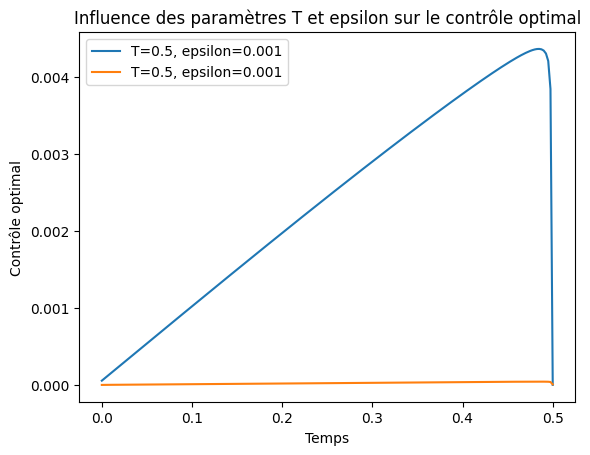

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve



# Paramètres fixes
Nx = 100
Nt = 200
L = 1.0
epsilon = 0.01

# Paramètres à faire varier
T = 0.5
epsilon = 0.001
def zd(t):
    return np.sin(t)


U_optimal, Y_direct = solver(Nx, Nt, L, T, zd, epsilon)

# Visualisation des résultats
plt.plot(np.linspace(0, T, Nt + 1), U_optimal[-1, :], label=f'T={T}, epsilon={epsilon}')
        
# Affichage de la trajectoire optimale Y_direct(t, L)
plt.plot(np.linspace(0, T, Nt + 1), Y_direct[:,-1], label=f'T={T}, epsilon={epsilon}')


plt.xlabel('Temps')
plt.ylabel('Contrôle optimal')
plt.title('Influence des paramètres T et epsilon sur le contrôle optimal')
plt.legend()
plt.show()


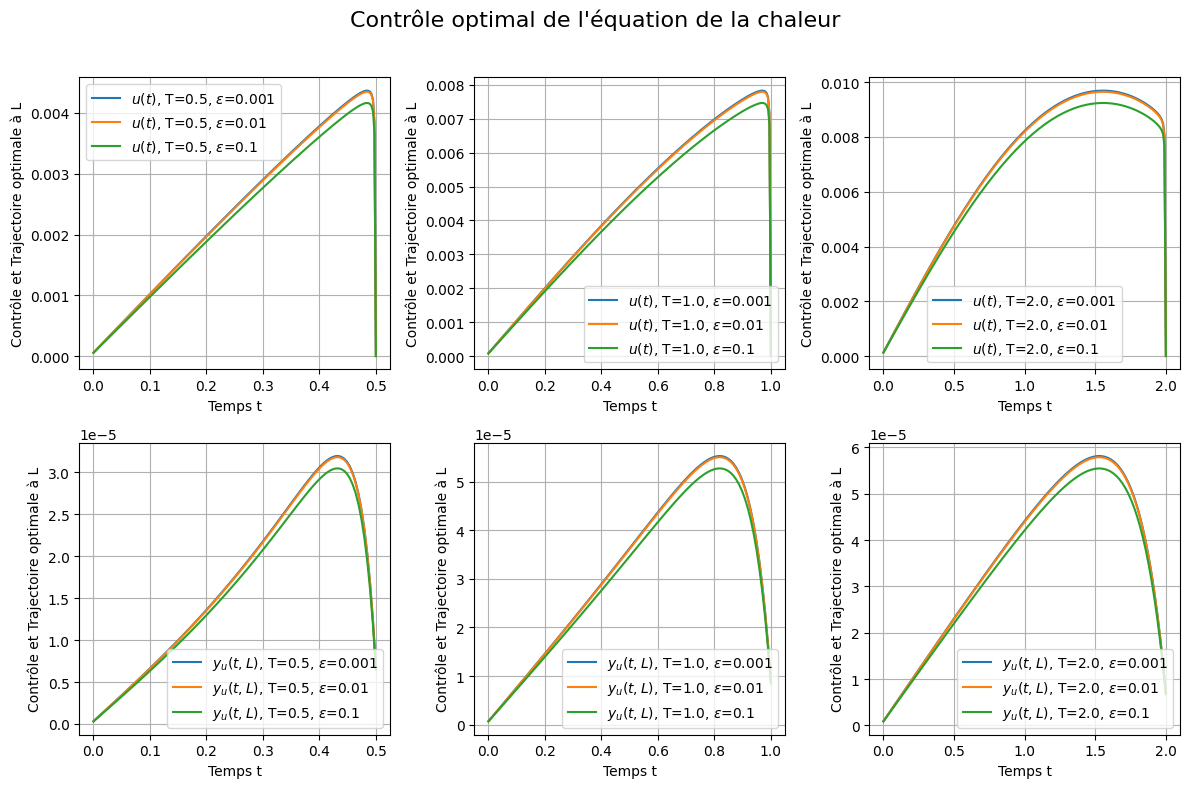

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve



# Paramètres à faire varier
T_values = [0.5, 1.0, 2.0]
epsilon_values = [0.001, 0.01, 0.1]

def zd(t):
        return np.sin(t)

def Test(epsilon_values,T_values, zd):
    # Paramètres fixes
    Nx = 100
    Nt = 200


    # Création de la matrice de sous-graphiques 2x3
    fig, ax = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(12, 8))
    # fig, ax = plt.subplots(2, 3, sharex=True, sharey=False, figsize=(12, 8))
    fig.suptitle("Contrôle optimal de l'équation de la chaleur", fontsize=16)



    for i, T in enumerate(T_values):
        for j, epsilon in enumerate(epsilon_values):
            U_optimal, Y_direct = solver(Nx, Nt, L, T, zd, epsilon)

            # Visualisation des résultats
            ax[0, i].plot(np.linspace(0, T, Nt + 1), U_optimal[-1, :], label=f'$u(t)$, T={T}, $\epsilon$={epsilon}')

            # Affichage de la trajectoire optimale Y_direct(t, L)
            ax[1, i].plot(np.linspace(0, T, Nx - 1), Y_direct[-1,:], label=f'$y_u(t, L)$, T={T}, $\epsilon$={epsilon}')
            # ax[1, i].plot(np.linspace(0, T, Nt + 1), Y_direct[:,-1], label=f'$y_u(t, L)$, T={T}, $\epsilon$={epsilon}')


    # Ajustements des paramètres globaux des sous-graphiques
    for a in ax.flat:
        a.set(xlabel='Temps t', ylabel='Contrôle et Trajectoire optimale à L')
        a.legend()
        a.grid(True)

    # Ajustement de l'espacement entre les sous-graphiques
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


Test(epsilon_values,T_values, zd)
